<a href="https://colab.research.google.com/github/samiksha0shukla/Bitcoin-price-prediction/blob/main/predictionlive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import os
import pandas as pd

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-01 00:00:00+00:00,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,0.0,0.0
2024-03-02 00:00:00+00:00,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,0.0,0.0
2024-03-03 00:00:00+00:00,62031.578125,63230.210938,61435.023438,63167.371094,26253811450,0.0,0.0


In [6]:
btc.index = pd.to_datetime(btc.index, format='%Y-%m-%d').date

In [7]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-01,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,0.0,0.0
2024-03-02,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,0.0,0.0
2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,26253811450,0.0,0.0
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414062,70670471105,0.0,0.0


In [8]:
del btc["Dividends"]
del btc["Stock Splits"]

In [9]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: >

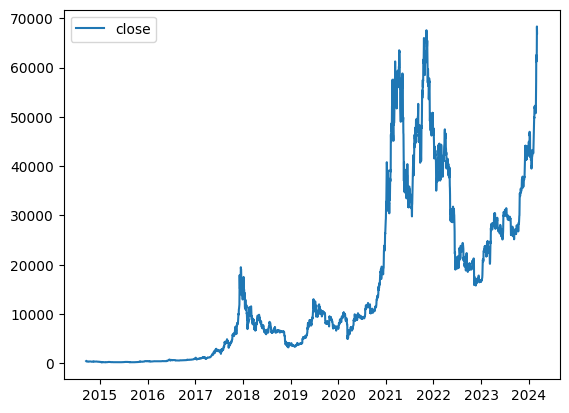

In [10]:
btc.plot.line(y="close", use_index=True)

In [15]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [16]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-03-01,1.333333,-0.116355,0.251587
2024-03-02,1.333333,-0.116355,0.251587
2024-03-03,1.333333,-0.116355,0.251587
2024-03-04,1.333333,-0.116355,0.251587


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [19]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-03-01,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,1.333333,-0.116355,0.251587
2024-03-02,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,1.333333,-0.116355,0.251587
2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,26253811450,1.333333,-0.116355,0.251587
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414062,70670471105,1.333333,-0.116355,0.251587


In [20]:
btc["tomorrow"] = btc["close"].shift(-1)

In [21]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-03-01,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,1.333333,-0.116355,0.251587,62029.847656
2024-03-02,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,1.333333,-0.116355,0.251587,63167.371094
2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,26253811450,1.333333,-0.116355,0.251587,68330.414062
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414062,70670471105,1.333333,-0.116355,0.251587,66958.250000


In [22]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [23]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-03-01,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,1.333333,-0.116355,0.251587,62029.847656,0
2024-03-02,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,1.333333,-0.116355,0.251587,63167.371094,1
2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,26253811450,1.333333,-0.116355,0.251587,68330.414062,1
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414062,70670471105,1.333333,-0.116355,0.251587,66958.250000,0


In [24]:
btc["target"].value_counts()

1    1833
0    1625
Name: target, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [26]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.46835443037974683

In [27]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test["target"], preds], axis=1)
  return combined

In [28]:
def backtest(data, model, predictors, start=1095, step=150):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

In [29]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [30]:
precision_score(predictions["target"], predictions["predictions"])

0.5052710843373494

In [31]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [32]:
btc, new_predictors = compute_rolling(btc.copy())

In [33]:
predictions = backtest(btc, model, new_predictors)

In [34]:
precision_score(predictions["target"], predictions["predictions"])

0.5246195165622203

In [35]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-03-01,0,0
2024-03-02,1,0
2024-03-03,1,0
2024-03-04,0,0


In [36]:
prediction = predictions["predictions"].iloc[-1]

if prediction == 1:
  print("The price of bitcoin will increase")

else:
    print("The price of bitcoin will decrease")

The price of bitcoin will decrease
